In [2]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

In [1]:
!apt-get update
!apt-get install -y iverilog

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,266 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,103 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packa

Installing. Please wait... done!


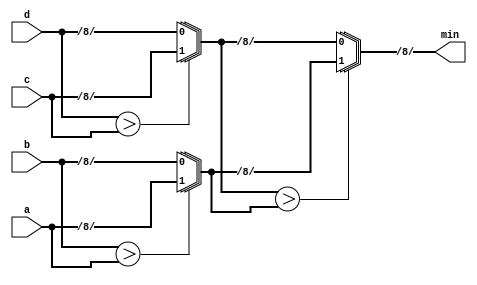

In [ ]:
# Conditional Ternary Operator
%%print_verilog

module top_module (
    input [7:0] a, b, c, d,
    output [7:0] min);//

    // assign intermediate_result1 = compare? true: false;
    wire [7:0] ir1, ir2;
    assign ir1 = b > a ? a : b;
    assign ir2 = d > c ? c : d;
    assign min = ir2 > ir1 ? ir1 : ir2;

endmodule

In [ ]:
%%verilog

//////////////////////////////////////////////////////////
module tb; reg[7:0] a_tb, b_tb, c_tb, d_tb; wire[7:0] min_tb;

  top_module top(.a(a_tb), .b(b_tb), .c(c_tb), .d(d_tb), .min(min_tb));

  initial begin
    $dumpfile("tb");
    $dumpvars();

    # 0 a_tb = 8'd3; b_tb = 8'd5; c_tb = 8'd2; d_tb = 8'd9;
    # 1 a_tb = 8'd11; b_tb = 8'd5; c_tb = 8'd9; d_tb = 8'd9;
    # 1 a_tb = 8'd10; b_tb = 8'd5; c_tb = 8'd11; d_tb = 8'd9;
    # 1 a_tb = 8'd6; b_tb = 8'd5; c_tb = 8'd4; d_tb = 8'd9;
    # 1 $finish;
  end
//////////////////////////////////////////////////////////

endmodule

//////////////////////////////////////////////////////////
module top_module (
    input [7:0] a, b, c, d,
    output [7:0] min);

    wire [7:0] ir1, ir2;
    assign ir1 = b > a ? a : b;
    assign ir2 = d > c ? c : d;
    assign min = ir2 > ir1 ? ir1 : ir2;

endmodule
//////////////////////////////////////////////////////////

VCD info: dumpfile tb.vcd opened for output.



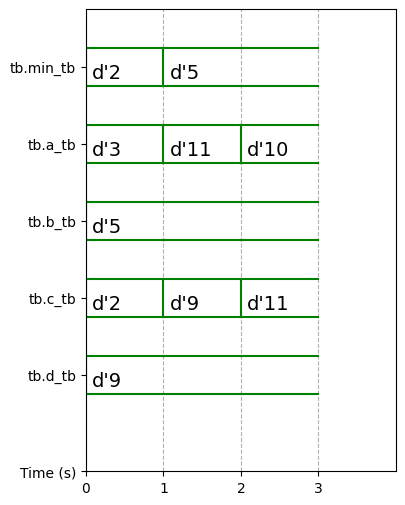

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.min_tb','tb.a_tb', 'tb.b_tb', 'tb.c_tb', 'tb.d_tb']
time_begin = 0
time_end = 3
base = 'dec' # bin, dec, dec2, hex, octal

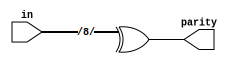

In [ ]:
# Reduction operators
%%print_verilog

module top_module (
    input [7:0] in,
    output parity);

    assign parity = ^ in[7:0];

endmodule

In [ ]:
%%verilog

//////////////////////////////////////////////////////////
module tb; reg[7:0] in_tb; wire parity_tb;

  top_module top(.in(in_tb), .parity(parity_tb));

  initial begin
    $dumpfile("tb");
    $dumpvars();

    # 0 in_tb = 8'd3;
    # 1 $finish;
  end
//////////////////////////////////////////////////////////

endmodule

//////////////////////////////////////////////////////////
module top_module (
    input [7:0] in,
    output parity);

    assign parity = ^ in[7:0];

endmodule
//////////////////////////////////////////////////////////

VCD info: dumpfile tb.vcd opened for output.



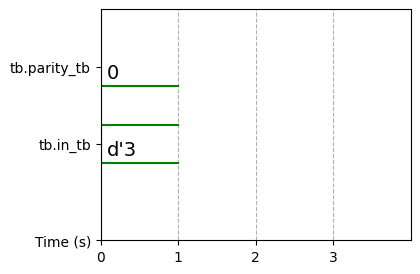

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.parity_tb', 'tb.in_tb']
time_begin = 0
time_end = 3
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
# does not work
sign_list = ['tb.parity_tb', 'tb.in_tb[7]', 'tb.in_tb[6]', 'tb.in_tb[5]', 'tb.in_tb[4]', 'tb.in_tb[3]', 'tb.in_tb[2]', 'tb.in_tb[1]', 'tb.in_tb[0]']

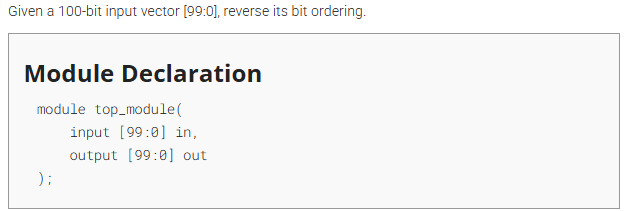

In [11]:
# Vector100r
%%writefile moreVerilog.v
module top_module(
    input [99:0] in,
    output [99:0] out
);
    genvar i;
    generate
      for (i=0; i<100; i = i+1) begin:
        assign out[99-i] = in[i];
      end
    endgenerate
endmodule


Overwriting moreVerilog.v


In [9]:
%%writefile tb.v
`timescale 1ns/1ns

module tb;
    wire out_tb[99:0]; reg in_tb[99:0];

    // Instantiate the stepone module
    top_module uut (
        .out(out_tb), .in(in_tb)
    );

    initial begin
        $dumpfile("tb.vcd");  // Make sure we generate tb.vcd
        $dumpvars(0, tb);     // Dump all signals in tb module

        # 0 in_tb = 99'd3980;
        # 5 in_tb = 99'd3456;
        // Monitor time and output signal
        $monitor("Time = %0t ns | Output = %b", $time, out_tb);

        #10 $finish;  // Run simulation for 10 time units
    end
endmodule

Overwriting tb.v


In [12]:
!iverilog -o tb.out moreVerilog.v tb.v  # Compile the updated testbench
!vvp tb.out                         # Run simulation, should generate tb.vcd

moreVerilog.v:8: syntax error
moreVerilog.v:8: error: invalid module item.
tb.out: Unable to open input file.
